## **Business Understanding**

Air travel safety is a critical concern for both industry stakeholders and the general public. While aviation is among the safetest modes of transport, accidents still occur.  Aircraft manufacturers, airlines, and regulators must therefore evaluate accident patterns to identify risks and improve safety standards.

**Real World Problem**

A new aviation safety advisory group is seeking data-driven recommendations on which aircraft models and manufacturers demonstrate the lowest safety risks. Their goal is to advise flight schools, private operators, and regulators on selecting aircraft types that minimize accident exposure while maintaining operational efficiency.

**Stakeholders**

- **Flight schools**: need to choose training aircraft that balance affordability and safety for students.  
- **Private aircraft owners**: want to make informed decisions when purchasing or operating aircraft.  
- **Regulatory bodies**: require evidence-based insights to guide safety recommendations and certification policies.  
- **Insurance companies**: benefit from understanding which aircraft types carry lower or higher risk.  

**Business Value** 
 
By analyzing accident data, this project will help stakeholders identify:  
1. Which aircraft models and manufacturers have lower accident rates.  
2. How accident severity differs across aircraft types.  
3. What operational factors (e.g., time of day, weather, number of engines) contribute to accident risk.  

**Guiding Business Questions**  

1. Which aircraft manufacturers and models have the lowest accident rates in the last 10–20 years?  
2. How severe are accidents associated with different aircraft types (fatal vs. non-fatal)?  
3. What actionable recommendations can be made about which aircraft types are best suited for minimizing safety risks?  

The findings will directly inform safety-focused decision-making in the aviation sector, with practical implications for reducing accident risks and improving long-term trust in air travel.

## **Data Understanding**

 We explore the dataset to understand its structure, key variables, and potential issues (missing values, duplicates). This helps us assess whether the dataset is suitable for answering our business questions about aviation safety.

This data set provides a record of aircraft accidents that occurred between **1919 - 2023**.


The dataset contains **23,967 rows** and **9 columns**. Each row represents an aviation accident/incident report. The columns provide details about the accident. 

**Columns Overview**
- Date – when the accident/incident occurred
- Location – where it occurred
- Country – country of occurrence
- Type – aircraft type involved
- Registration – aircraft registration number
- Operator – organization/airline operating the aircraft
- Aboard/Fatalities – number of people aboard and number of fatalities
- Cate (Accident Category) – classification of the occurrence
- Year – extracted year of occurrencE

The accident categories are :
- A - Accident
- I - Incident
- H - Hijacking
- C - Criminal occurrence
- O - Other occurrence
- U - type of occurence unknown
- 1 - hull-loss
- 2 - repairable damage

**Initial Observations**

- The dataset spans over a century of aviation history (1919–2023), giving a rich view of trends over time.
- The Cate column is essential for distinguishing between accidents, incidents, and other occurrences.
- The Fatalities variable will allow us to evaluate severity and safety across different dimensions (aircraft type, operator, country).
- Some columns (e.g., registration) may not be directly useful for safety insights and could be dropped later.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_accidents = pd.read_csv('./data/aviation-accident-data-2023-05-16.csv')
# read first 10 rows
df_accidents.head(10)

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
5,date unk.,Antonov An-12BP,CCCP-12172,Soviet AF,NaN,NaN,Russia,U1,unknown
6,date unk.,Antonov An-2,CCCP-N574,"GUSMP, Directorate of Polar Aviation",NaN,unknown,Russia,A1,unknown
7,date unk.,Antonov An-2,CCCP-01216,Aeroflot,0,Chita region,Russia,A2,unknown
8,date unk.,Antonov An-24B,RA-47794,Russian AF,0,NaN,Russia,A1,unknown
9,date unk.,Antonov An-26,01 red,Soviet AF,0,Orenburg Air Base,Russia,O1,unknown


In [3]:
# shape of dataset
df_accidents.shape

(23967, 9)

In [4]:
# overview of the dataset
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


From the overview of the datasets we see all columns are of the object data type. We also see that some columns like Registration, Operator, Fatalities, and Location have missing values since the non-null count does not add up to the total number of rows **23,967**

## **Data Preparation**

In this section we clean the data by handling missing values, check for duplicates,and removing irrelevant columns.
We also need to change the Fatalities column from an object data type to an integer data type.

In [5]:
# Checking for duplicates
df_accidents.duplicated().value_counts()

False    23852
True       115
dtype: int64

    From the code above we see that the data set has 115 duplicated items that we need to remove.

In [6]:
# remove duplicates and check if the duplicates were removed
df_accidents = df_accidents.drop_duplicates()
df_accidents.duplicated().value_counts()

False    23852
dtype: int64

    The total number of rows has now dropped from **23,967** to **23,852** due to the removal of duplicates.
    We now deal with missing values

In [7]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23852 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23852 non-null  object
 1   type          23852 non-null  object
 2   registration  22418 non-null  object
 3   operator      23848 non-null  object
 4   fatalities    20019 non-null  object
 5   location      22920 non-null  object
 6   country       23852 non-null  object
 7   cat           23852 non-null  object
 8   year          23852 non-null  object
dtypes: object(9)
memory usage: 1.8+ MB


    We first drop the registration column since it is not useful at this time.

In [8]:
# Drop the registration column
df_accidents = df_accidents.drop("registration",axis=1)

    There are now a total of seven columns remaining.

In [9]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23852 entries, 0 to 23966
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        23852 non-null  object
 1   type        23852 non-null  object
 2   operator    23848 non-null  object
 3   fatalities  20019 non-null  object
 4   location    22920 non-null  object
 5   country     23852 non-null  object
 6   cat         23852 non-null  object
 7   year        23852 non-null  object
dtypes: object(8)
memory usage: 1.6+ MB


    Next we check the number of missing values in the remaining columns.

In [10]:
# Check for missing values
df_accidents.isna().sum()

date             0
type             0
operator         4
fatalities    3833
location       932
country          0
cat              0
year             0
dtype: int64

    The columns with missing values are operator, fatalities and location.
    We start with the operator column.

In [11]:
# Filling in the values in the operator column
# Since the operator column is an object type we check for the unique values to figure out how to fill in the missing values.
df_accidents["operator"].value_counts()

USAAF                                  2604
USAF                                   1118
RAF                                     920
US Navy                                 745
German AF                               411
                                       ... 
Evergreen Helicopters                     1
Flight Safety International               1
Stephens Aviation                         1
Aviation Equipment Corp. of America       1
Rovos Air                                 1
Name: operator, Length: 6017, dtype: int64

    We will now fill in the missing values with mode of the column.

In [12]:
operator_mode = df_accidents["operator"].mode()[0]
operator_mode

'USAAF'

In [13]:
df_accidents["operator"] = df_accidents["operator"].fillna(operator_mode)

    We now check if the operator column has any missing values.

In [14]:
df_accidents.isna().sum()

date             0
type             0
operator         0
fatalities    3833
location       932
country          0
cat              0
year             0
dtype: int64

     Next we tackle the location column

In [15]:
# We will still use the mode function for this cause the column is an object type column
df_accidents["location"].value_counts()

unknown                272
Havana-JosÃ© Mar...    105
Miami Internatio...     71
Beirut Internati...     48
Amsterdam-Schiph...     44
                      ... 
Ujung Pandang ha...      1
Groot Linden             1
near Daiku               1
near Morgantown, WV      1
Juiz De Fora-Fra...      1
Name: location, Length: 14608, dtype: int64

In [16]:
df_accidents["location"] = df_accidents["location"].fillna(df_accidents["location"].mode()[0])

In [17]:
df_accidents.isna().sum()

date             0
type             0
operator         0
fatalities    3833
location         0
country          0
cat              0
year             0
dtype: int64

    We now focus on the fatalities column changing it from object type to integer type and filling in the missing values.

In [18]:
# Checking for unique values
print(df_accidents["fatalities"].unique()[:50])

[nan '0' '14' '1' '4' '2' '5' '6' '3' '7' '5+ 1' '8' '16' '12' '9' '15'
 '14+ 1' '10' '11' '35+ 9' '13' '2+ 2' '17' '19' '20' '0+ 1' '18' '13+ 1'
 '25' '29' '23' '5+ 7' '24' '36' '26' '22' '27' '12+ 1' '21' '7+ 6' '35'
 '32' '31' '2+ 1' '34' '28' '20+ 5' '0+ 2' '30' '41']


In [19]:
# Replacing nan with '0'
df_accidents['fatalities'].fillna(0, inplace=True)

In [20]:
print(df_accidents["fatalities"].unique()[:50])

[0 '0' '14' '1' '4' '2' '5' '6' '3' '7' '5+ 1' '8' '16' '12' '9' '15'
 '14+ 1' '10' '11' '35+ 9' '13' '2+ 2' '17' '19' '20' '0+ 1' '18' '13+ 1'
 '25' '29' '23' '5+ 7' '24' '36' '26' '22' '27' '12+ 1' '21' '7+ 6' '35'
 '32' '31' '2+ 1' '34' '28' '20+ 5' '0+ 2' '30' '41']


In [21]:
# Changing the column from object to integer and fill in the missing values
df_accidents['fatalities'] = df_accidents['fatalities'].apply(lambda x: sum(map(int, x.replace(' ', '').split('+'))) if '+' in str(x) else int(x))


In [22]:
df_accidents.isna().sum()

date          0
type          0
operator      0
fatalities    0
location      0
country       0
cat           0
year          0
dtype: int64

In [23]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23852 entries, 0 to 23966
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        23852 non-null  object
 1   type        23852 non-null  object
 2   operator    23852 non-null  object
 3   fatalities  23852 non-null  int64 
 4   location    23852 non-null  object
 5   country     23852 non-null  object
 6   cat         23852 non-null  object
 7   year        23852 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.6+ MB


**To explain the code:**

- df_accidents['fatalities'] = ...Assigns the result back into the fatalities column.
- .apply(lambda x: ... )- Runs the anonymous function (lambda) once on each cell value x of the column.
- if '+' in str(x)- Converts x to a string and checks if it contains the '+' character.
- x.replace(' ', '')- Removes spaces from the string so splitting is clean.
- .split('+') - Splits the string on '+' into parts ("5+1" to ['5', '1']).
- map(int, ...)- Converts each split substring to an integer.
- sum(...)- Adds the integers together.
- else int(x)- If there is no '+' sign, the code converts the value directly to an integer ( "14" to 14).

## **Exploratory Data Analysis**

In this section, we explore the aviation accidents dataset to uncover insights related to our three guiding questions:

1. Which aircraft models/manufacturers have lower accident rates?

2. How accident severity differs across aircraft types.

3. What operational factors contribute to accident risk.

**1. Aircraft Models and Operators**

We examine the distribution of accidents across aircraft models and operators to identify which are most frequently involved in accidents. While higher counts may reflect popularity and fleet size rather than inherent safety risks, this provides a starting point for further analysis.

In [24]:
# accident counts by aircraft type
accident_counts = df_accidents['type'].value_counts()
accident_counts

Douglas C-47A (DC-3)                   1916
Douglas C-47 (DC-3)                     668
Douglas C-47B (DC-3)                    592
Curtiss C-46A                           564
Antonov An-2R                           391
                                       ... 
AÃ©rospatiale SN.600 Corvette             1
Embraer ERJ 170LR (ERJ-170-100 LR)        1
Airbus A321-251N                          1
Douglas R4D-6L (DC-3)                     1
Consolidated Liberator C.VII (C-87)       1
Name: type, Length: 3201, dtype: int64

In [25]:
# Top 10 aircraft types with highest accident frequency
top_types = accident_counts.head(10)
top_types

Douglas C-47A (DC-3)         1916
Douglas C-47 (DC-3)           668
Douglas C-47B (DC-3)          592
Curtiss C-46A                 564
Antonov An-2R                 391
Junkers Ju-52/3m              375
Curtiss C-46D                 344
Douglas Dakota III (DC-3)     262
DHC-6 Twin Otter 300          258
Cessna 208B Grand Caravan     247
Name: type, dtype: int64

In [26]:
# Accident rates by operator
operator_counts = df_accidents['operator'].value_counts().head(10)
operator_counts

USAAF         2608
USAF          1118
RAF            920
US Navy        745
German AF      411
private        299
Aeroflot       198
Unknown        185
Soviet AF      141
Air France     138
Name: operator, dtype: int64

**2. Accident Severity**

We define severity as the proportion of accidents that resulted in at least one fatality for each aircraft type. This metric allows us to compare how often accidents involving different aircraft types are deadly, beyond just the raw count of accidents.

In [27]:
# A binary flag for whether the accident was fatal(atleast 1 fatality)
df_accidents['FatalFlag'] = df_accidents['fatalities'].apply(lambda x:1 if x > 0 else 0)
df_accidents['FatalFlag'].value_counts().head(10)

0    14538
1     9314
Name: FatalFlag, dtype: int64

In [28]:
# Aircraft types with at least 10 recorded accidents
type_counts = df_accidents['type'].value_counts()
common_types = type_counts[type_counts >= 10].index

severity_by_type_filtered = (
    df_accidents[df_accidents['type'].isin(common_types)]
    .groupby('type')['FatalFlag']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

print(severity_by_type_filtered)

type
Morane Saulnier (FMA) MS.760 Paris I    1.000000
Consolidated C-10A Catalina (PBY-5A)    0.900000
Short Sunderland                        0.866667
Ilyushin Il-14P                         0.857143
Short Sunderland III                    0.848485
Consolidated Catalina                   0.842105
Ilyushin Il-12P                         0.833333
Let L-410UVP-E20                        0.818182
Boeing KC-97G Stratofreighter           0.812500
Nord 2501 Noratlas                      0.800000
Name: FatalFlag, dtype: float64


    This output explains the deadliness of different aircraft types when they crash.

    For example:

    Morane Saulnier (FMA) MS.760 Paris I = 1.0 - Every recorded crash in the dataset involving this aircraft was fatal. No survivors.

    Consolidated C-10A Catalina (PBY-5A) = 0.9 = 90% of the crashes recorded for this type resulted in at least one fatality.

    Short Sunderland = 0.8667 - 87% fatal crash rate.

    Let L-410UVP-E20 = 0.8182 - 82% fatal crash rate.

**3. Operational Factors**

We investigate external and operational factors such as:

- Year: accident trends over time.

- Country: regional differences in accident frequency.

- Category (Cat): types of accidents (Accident, Incident, Hijacking, etc.).

These provide context on how broader operational conditions influence aviation safety.

The accident categories are :
- A - Accident
- I - Incident
- H - Hijacking
- C - Criminal occurrence
- O - Other occurrence
- U - type of occurence unknown
- 1 - hull-loss
- 2 - repairable damage

In [29]:
# Trend of accidents by year
accidents_by_year = df_accidents.groupby('year').size()

# Top 10 countries with most accidents
accidents_by_country = df_accidents['country'].value_counts().head(10)

# Accident distribution by category
accidents_by_category = df_accidents['cat'].value_counts()

print("Accidents by year:")
print(accidents_by_year.tail(10))

print("Top 10 accident countries:")
print(accidents_by_country)

print("Accident distribution by category:")
print(accidents_by_category)


Accidents by year:
year
2015       224
2016       209
2017       196
2018       234
2019       245
2020       203
2021       183
2022       168
2023        56
unknown     61
dtype: int64
Top 10 accident countries:
USA                4376
Russia             1418
Unknown country     838
U.K.                837
Canada              825
India               700
Brazil              609
France              550
China               514
Germany             513
Name: country, dtype: int64
Accident distribution by category:
A1    17318
A2     2494
C1     1181
H2     1049
O1     1033
U1      571
C2       84
O2       65
H1       42
I2       12
I1        3
Name: cat, dtype: int64


## **Visualizations**

**1. Which aircraft models/manufacturers have lower accident rates?**

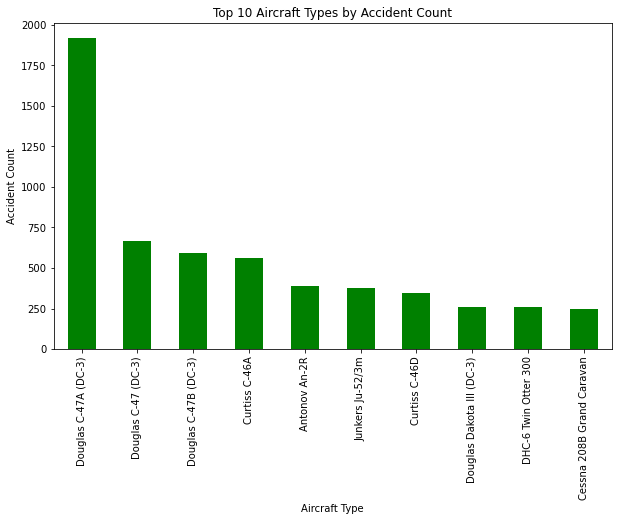

In [30]:
plt.figure(figsize=(10,6))
top_types.plot(kind='bar', color='green')
plt.title("Top 10 Aircraft Types by Accident Count")
plt.ylabel("Accident Count")
plt.xlabel("Aircraft Type")
plt.show()

**Interpretation:**

- The Douglas C-47 (military version of the DC-3) dominates with staggering counts across its sub-variants (C-47A/B, Dakota III). Why? Mass production during WWII and heavy deployment for troop/cargo transport. More planes + more missions = more accidents.

- Other WWII-era transport aircraft like Curtiss C-46 and Junkers Ju-52 also appear high, again reflecting the war era.

- On the civilian side, Antonov An-2R, Twin Otter, and Cessna Caravan show up. These are widely used utility aircraft in harsh, remote environments (small strips, developing regions, bad weather)

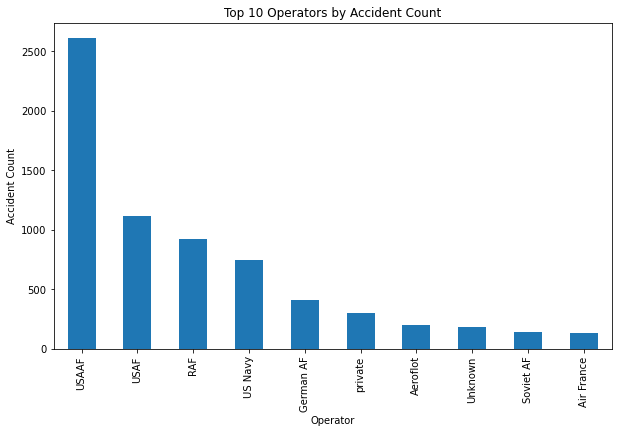

In [31]:
plt.figure(figsize=(10,6))
operator_counts.plot(kind='bar')
plt.title("Top 10 Operators by Accident Count")
plt.ylabel("Accident Count")
plt.xlabel("Operator")
plt.show()

**Interpretation:**

- Military operators dominate accident history — USAAF, USAF, RAF, US Navy, and German AF account for thousands of accidents. This makes sense because during WWII and Cold War, military flying intensity was massive, risk tolerance was higher, and safety standards were not the same as civil aviation.

- Private operators appear, but with far fewer accidents (likely due to smaller fleets and lighter aircraft).

- Civilian airlines like Aeroflot and Air France appear with notable but much lower counts compared to military.

**2. Accident Severity**

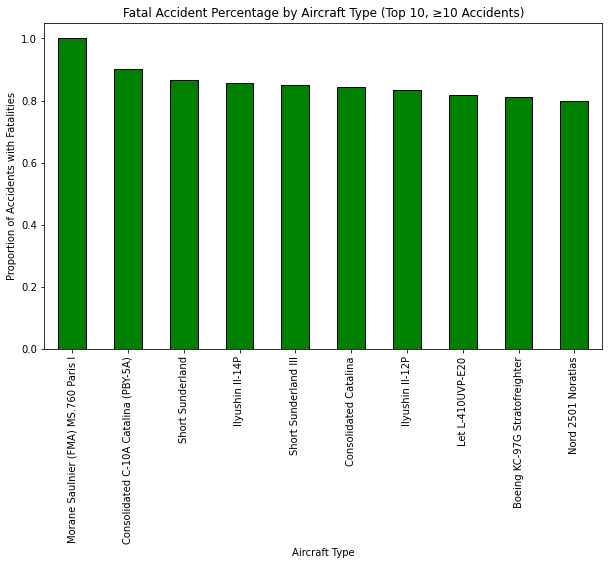

In [32]:
plt.figure(figsize=(10,6))
severity_by_type_filtered.plot(kind='bar', color='green', edgecolor='black')

plt.title("Fatal Accident Percentage by Aircraft Type (Top 10, ≥10 Accidents)")
plt.xlabel("Aircraft Type")
plt.ylabel("Proportion of Accidents with Fatalities")
plt.show()

**Interpretation**

Morane Saulnier (FMA) MS.760 Paris I = 1.0 - Every recorded crash in the dataset involving this aircraft was fatal. No survivors.

Consolidated C-10A Catalina (PBY-5A) = 0.9 = 90% of the crashes recorded for this type resulted in at least one fatality.

Short Sunderland = 0.8667 - 87% fatal crash rate.

Let L-410UVP-E20 = 0.8182 - 82% fatal crash rate.

**3. Which operational factors contribute to accident risk?**

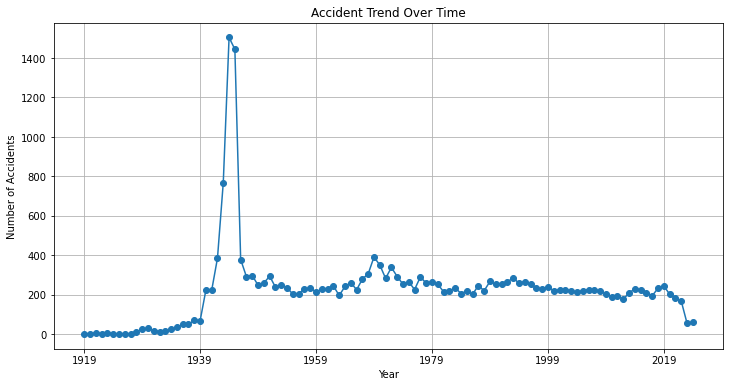

In [33]:
plt.figure(figsize=(12,6))
accidents_by_year.plot(kind='line', marker='o')
plt.title("Accident Trend Over Time")
plt.ylabel("Number of Accidents")
plt.xlabel("Year")
plt.grid(True)
plt.show()


**Interpretation:**

**Early Period (1919–1935)**

Very low accident numbers — aviation was small-scale, fewer flights worldwide.

**Sharp Spike (1939–1945)**

Enormous peak during World War II — military aviation activity skyrocketed, and combat/fleet operations caused many losses.

This is the single largest factor in the dataset.

**Post-War Decline (late 1940s–1950s)**

Steep drop after WWII → reduction in combat operations.

However, still higher than pre-war because commercial aviation began expanding.

**Stable/Moderate Period (1960s–1990s)**

Accidents fluctuate around 200–300 per year.

Reflects rapid growth of civil aviation — more flights = more incidents, but offset by better safety protocols and technology.

**Gradual Decline (2000s–2019)**

Accident frequency trends downward, reflecting improvements in modern aircraft design, navigation systems, and training.

**Recent Drop (2020–2023)**

Dramatic fall after 2019. Likely driven by the COVID-19 pandemic, when global flights decreased sharply.

Suggests external operational disruptions (like pandemics) drastically affect accident frequency.

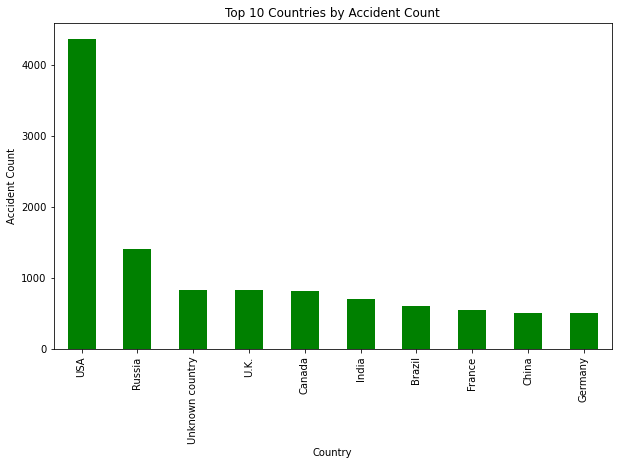

In [34]:
plt.figure(figsize=(10,6))
accidents_by_country.plot(kind='bar', color="green")
plt.title("Top 10 Countries by Accident Count")
plt.ylabel("Accident Count")
plt.xlabel("Country")
plt.show()


**Interpretation:**
- USA leads (4,376 accidents), followed by Russia (1,418).

- High counts in the USA/Canada/U.K. don’t automatically mean “less safe”—these are countries with large aviation sectors.

- Emerging markets (India, Brazil, China) also show high counts, often linked to rapidly expanding fleets + infrastructure gaps.

- “Unknown country” being 838 means data gaps exist, limiting some operational insights.

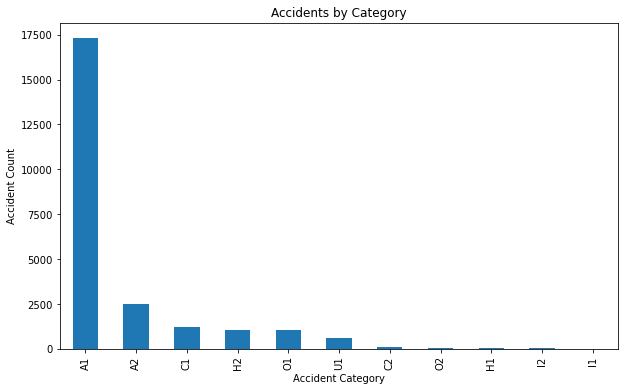

In [35]:
plt.figure(figsize=(10,6))
accidents_by_category.plot(kind='bar')
plt.title("Accidents by Category")
plt.ylabel("Accident Count")
plt.xlabel("Accident Category")
plt.show()

**Interpretation:**
**Dominance of A1 (Accident – hull loss)**

- A1 accounts for the overwhelming majority (17,000+ cases).

- This means most reported occurrences are serious, non-repairable accidents, not just minor incidents.

- It reflects that data collection prioritizes major accidents over less severe events.

**A2 (Accident – repairable damage)**

- A2 is the next largest, with around 2,500 cases.

- These are still significant accidents but with survivability and lower operational loss.

**Criminal (C1), Hijacking (H2), Other (O1, O2), Incidents (I1, I2)**

- Much smaller counts compared to accidents.

- This shows criminal/terrorism-related and security threats are rare but still present.

- Hijackings (H2) and criminal cases (C1) remind us that operational safety isn’t only mechanical — it also involves human/security factors.

**Minimal representation of unknowns (U)**

- Very few “unknown” categories → dataset is fairly reliable and categorized well.

In [36]:
# Downloading clean data
df_accidents.to_csv("Cleaned_accident_data.csv", index=False)

## **Recommendations**

**Q1: Which aircraft models/manufacturers have lower accident rates?**

**Findings:**

- Legacy war-era and utility aircraft dominate historical accident counts (e.g., Douglas C-47, Curtiss C-46, Junkers Ju-52). Modern aircraft like the Airbus A320 or Boeing 737 show far fewer accidents.

**Recommendations:**

- Flight schools - Avoid older legacy types for training fleets. Prioritize certified modern light trainers (e.g., Cessna, Piper) with stronger safety records.

- Private operators - Retire aging high-risk aircraft (e.g., utility types with frequent accidents in harsh conditions) and invest in modern alternatives with better safety technology.

- Regulators/insurers - Incentivize use of newer aircraft by linking certification and premiums to proven safety performance post-2000.

**Q2: How does accident severity differ across aircraft types?**

**Findings:**

- Certain aircraft (e.g., Morane Saulnier MS.760, Catalina, Short Sunderland) show >80% fatal crash rates. In contrast, modern jets and larger commercial types have much lower fatality ratios, with accidents more often survivable.

**Recommendations:**

- Charter operators/flight schools - Do not use aircraft with historically extreme fatality ratios for passenger or student operations; restrict them to museum or display flying.

- Regulators - Direct safety oversight and crashworthiness upgrades toward small utility and military-derived aircraft, which are disproportionately deadly.

- Airlines - Continue investments in cabin safety, survivability measures, and training that enhance post-crash outcomes..

**Q3: What operational factors contribute to accident risk?**

**Findings:**

- Accident frequency peaked during WWII (operational intensity, low safety standards).

Since 2000, steady decline in accidents due to safety technologies and regulation.

Majority of reported cases are catastrophic hull losses (A1), while early-warning categories (incidents, repairable damage) are underreported.

**Recommendations:**

- Regulators - Enforce stronger incident (A2, I1, I2) reporting to catch problems before they escalate into hull-loss events.

- Flight schools and operators - Adopt modern navigation, weather monitoring, and automation to sustain downward accident trends.

- All stakeholders - Maintain robust aviation security protocols, since hijackings and criminal incidents, while rare, remain high-impact risks.

## **Conclusion**

Modern aircraft are safer than older designs, and accident severity has steadily declined with technology and regulation.

- Legacy aircraft (especially war-era and certain utility types) are accident-prone and often fatal when crashes occur. These should be phased out of active training and charter use.

- Modern jets and certified light trainers are far safer and should be the backbone of aviation training and commercial operations.

- Operational vigilance matters: safety gains can erode without continuous investment in incident reporting, security, and emerging technologies.

The safest path forward for stakeholders is to invest in modern aircraft, enforce stronger early-warning reporting, and avoid high-fatality legacy types. This approach will minimize accident exposure, reduce insurance risk, and sustain public trust in aviation safety.